In [3]:
import argparse
import math
import os
import random
import sys
import time
import yaml

import numpy as np
import torch

import sys
sys.path.append('../yolov5/')

from utils.datasets import create_dataloader
from utils.general import colorstr

import matplotlib.pyplot as plt

albumentations: Blur(always_apply=False, p=0.01, blur_limit=(3, 7)), MedianBlur(always_apply=False, p=0.01, blur_limit=(3, 7)), ToGray(always_apply=False, p=0.01), CLAHE(always_apply=False, p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning '../input/yolo_ds/0_val_images.cache' images and labels... 5280 found, 0 missing, 4335 empty, 0 corrupted: 100%|██████████| 5280/5280 [00:00<?, ?it/s]


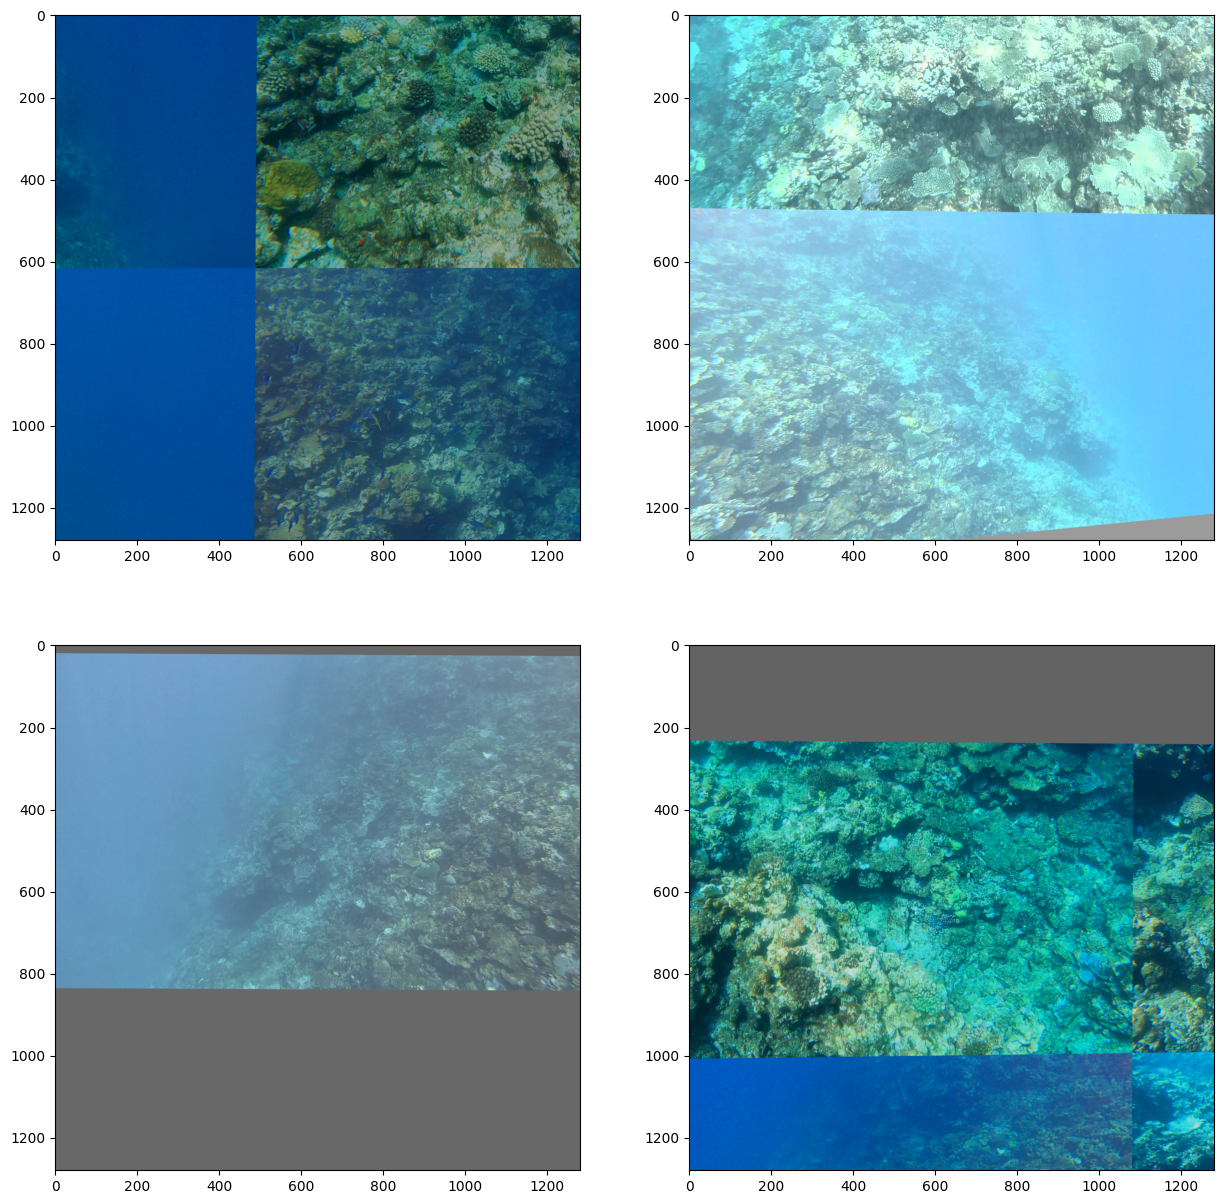

In [4]:
with open('../configs/hyp.reef-aug.yaml', errors='ignore') as f:
    hyp = yaml.safe_load(f)
dataloader = create_dataloader(
    path='../input/yolo_ds/0_val_images.txt', 
    imgsz=1280, 
    batch_size=4, 
    stride=1, 
    single_cls=True,
    hyp=hyp,
    augment=True,
    pad=0.0, 
    rect=False,
    workers=0, 
    prefix=colorstr(f'val: '))[0]

for batch_i, (im, targets, paths, shapes) in enumerate(dataloader):
    break
np_im = im.detach().numpy()

f, axs = plt.subplots(2,2, figsize=(15,15))
for i,ax in enumerate(axs.ravel()):
    ax.imshow(np_im[i].transpose(1, 2, 0))

plt.savefig('../media/augmentation_sample.jpg')
plt.show()

plt.close('all')